In [10]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.relpath("../src"))

import utility as ut

print("Setup complete.")

Setup complete.


In [11]:
path = os.path.abspath("./train-test")
train_filename = "data_yearly_hourly_train"
test_filename = "data_yearly_hourly_test"
ext = "csv"
LABEL = "calls"

raw_train_data = pd.read_csv(os.path.join(path, ".".join([train_filename, ext])), infer_datetime_format = True)
raw_test_data = pd.read_csv(os.path.join(path, ".".join([test_filename, ext])), infer_datetime_format = True)
print("Raw data loaded.")

Raw data loaded.


In [12]:
raw_train_data

,day_of_year,hour,calls,Latitude,Longitude
0,1,0,27,47.627013,-122.321072
1,1,1,20,47.621403,-122.322924
2,1,2,20,47.597870,-122.321223
3,1,3,11,47.609992,-122.325025
4,1,4,6,47.613698,-122.314196
...,...,...,...,...,...
61236,365,19,15,47.614226,-122.331849
61237,365,20,13,47.623986,-122.327202
61238,365,21,20,47.614365,-122.336924
61239,365,22,12,47.610651,-122.338005


In [13]:
to_roll_columns = ["Latitude", "Longitude"]
cat_columns = ["day_of_year", "hour"]

roll_columns = ["_".join([name, "rel"]) for name in to_roll_columns]
raw_train_data[roll_columns] = raw_train_data[to_roll_columns].rolling(4, center = True).mean()
raw_test_data[roll_columns] = raw_test_data[to_roll_columns].rolling(4, center = True).mean()

cols_to_transform = list(raw_train_data.columns)
cols_to_transform = [x for x in cols_to_transform if x not in cat_columns]
cols_to_transform.remove(LABEL)

train_data = ut.scale(raw_train_data, cols_to_transform)
test_data = ut.scale(raw_test_data, cols_to_transform)

train_data.dropna(inplace = True)
test_data.dropna(inplace = True)

# train_data["hour"] = train_data["hour"] / train_data["hour"].max()
# train_data["day_of_year"] = train_data["day_of_year"] / train_data["day_of_year"].max()
# test_data["hour"] = test_data["hour"] / test_data["hour"].max()
# test_data["day_of_year"] = test_data["day_of_year"] / test_data["day_of_year"].max()

In [14]:
train_data = pd.get_dummies(train_data, columns = cat_columns)
test_data = pd.get_dummies(test_data, columns = cat_columns)

test_data[list(set(train_data.columns).difference(set(test_data.columns)))] = 0

In [15]:
path_to_save = os.path.relpath("./train-test")
train_data.to_csv(os.path.join(path_to_save, ".".join(["train_data", "csv"])), index = False)
test_data.to_csv(os.path.join(path_to_save, ".".join(["test_data", "csv"])), index = False)

<AxesSubplot:xlabel='hour', ylabel='calls'>

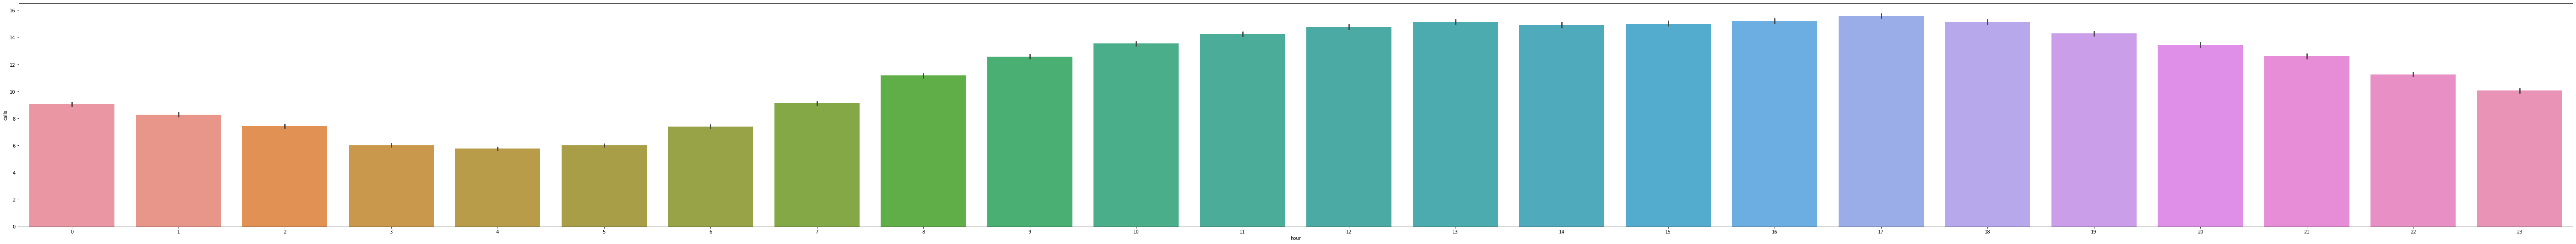

In [16]:
sns.barplot(data = raw_train_data, x = "hour", y = "calls")

In [17]:
plt.rcParams["figure.figsize"] = (100, 9)
sns.barplot(data = raw_train_data, x = "day_of_year", y = "calls")
